# Desicion Tree with K-fold cross validation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, RobustScaler
from dtreeviz.trees import dtreeviz
from IPython.display import Image, display_svg, SVG

Defining functions that are used within the notebook.

In [2]:
# Feature importance and selection
def plot_feature_importance(df_train, df_test, max_tree_depth, title='Feature importance'):
    clf = DecisionTreeClassifier(max_depth=max_tree_depth)
    X = df_train
    y = df_test
    clf = clf.fit(X, y)

    feature_names = df_train.columns
    feature_importance_df = pd.DataFrame(list(zip(clf.feature_importances_, feature_names)), columns=["feature_importance", "feature_name"])
    feature_importance_df = feature_importance_df.sort_values(by='feature_importance', ascending=False)
    useless_features = list(feature_importance_df[feature_importance_df['feature_importance'] == 0]['feature_name'])
    feature_importance_df = feature_importance_df[feature_importance_df['feature_importance'] != 0]

    fig = px.bar(feature_importance_df, x="feature_name", y="feature_importance", log_y=True, title=title)
    fig.show(width=900, height=500)
    

    print("The following features were dropped:")
    print(useless_features)
    return useless_features

# Plot Decision Tree
def plot_tree(model, df, label, feature_names, class_names):
   viz = dtreeviz(tree_model= model, x_data=df, y_data=label, target_name="target", feature_names=feature_names, class_names=class_names, orientation='LR')
   viz
   viz.view()

# K-fold cross validation
def cross_validation(model, _X, _Y, _cv):
      '''Function to perform 10 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=10
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_Y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data, cv):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold", "6th Fold", "7th Fold", "8th Fold", "9th Fold", "10th Fold"]
        fold_labels = labels[0:cv]
        #X_axis = np.arange(len(labels[0:cv-1]))
        X_axis = np.arange(len(labels[0:cv]))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, fold_labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

# putting it all together
def fold_classify_and_plot1(df_train, df_test, max_tree_depth, cv, criterion,title='Feature importance'):
    clf = DecisionTreeClassifier(max_depth=max_tree_depth, criterion= criterion)
    X = df_train
    y = df_test
    clf = clf.fit(X, y)
    classificationResults = cross_validation(model= clf, _X= X, _Y= y, _cv= cv)
    print(classificationResults)

    feature_names = df_train.columns
    feature_importance_df = pd.DataFrame(list(zip(clf.feature_importances_, feature_names)), columns=["feature_importance", "feature_name"])
    feature_importance_df = feature_importance_df.sort_values(by='feature_importance', ascending=False)
    useless_features = list(feature_importance_df[feature_importance_df['feature_importance'] == 0]['feature_name'])
    feature_importance_df = feature_importance_df[feature_importance_df['feature_importance'] != 0]

    fig = px.bar(feature_importance_df, x="feature_name", y="feature_importance", log_y=True, title=title)
    fig.show(width=900, height=500)
    


    print("The following features were dropped:")
    print(useless_features)

    plot_result(cv= cv, x_label= "Decision Tree", y_label= "Accuracy", plot_title= f"Accuracy scores in {cv} Folds", train_data= classificationResults["Training Accuracy scores"], val_data= classificationResults["Validation Accuracy scores"])
    plot_result(cv= cv, x_label= "Decision Tree", y_label= "Precision", plot_title= f"Precision scores in {cv} Folds", train_data= classificationResults["Training Precision scores"], val_data= classificationResults["Validation Precision scores"])
    plot_result(cv= cv, x_label= "Decision Tree", y_label= "Recall", plot_title= f"Recall scores in {cv} Folds", train_data= classificationResults["Training Recall scores"], val_data= classificationResults["Validation Recall scores"])
    plot_result(cv= cv, x_label= "Decision Tree", y_label= "F1", plot_title= f"F1 scores in {cv} Folds", train_data= classificationResults["Training F1 scores"], val_data= classificationResults["Validation F1 scores"])
    metrics.plot_confusion_matrix(clf, X, y)
    plt.show() 
    # Visualize Desicion tree
    plot_tree(clf, X, y, feature_names, class_names)

def fold_classify_and_plot2(df_train, df_test, max_tree_depth, cv, criterion, title='Feature importance'):
    clfModel = DecisionTreeClassifier(max_depth=max_tree_depth, criterion= criterion)
    X = df_train
    y = df_test
    clf = clfModel.fit(X, y)
    classificationResults = cross_validation(model= clfModel, _X= X, _Y= y, _cv= cv)
    print(classificationResults)

    feature_names = df_train.columns
    feature_importance_df = pd.DataFrame(list(zip(clfModel.feature_importances_, feature_names)), columns=["feature_importance", "feature_name"])
    feature_importance_df = feature_importance_df.sort_values(by='feature_importance', ascending=False)
    useless_features = list(feature_importance_df[feature_importance_df['feature_importance'] == 0]['feature_name'])
    feature_importance_df = feature_importance_df[feature_importance_df['feature_importance'] != 0]

    fig = px.bar(feature_importance_df, x="feature_name", y="feature_importance", log_y=True, title=title)
    fig.show(width=900, height=500)
    


    print("The following features were dropped:")
    print(useless_features)

    plot_result(cv= cv, x_label= "Decision Tree", y_label= "Accuracy", plot_title= f"Accuracy scores in {cv} Folds", train_data= classificationResults["Training Accuracy scores"], val_data= classificationResults["Validation Accuracy scores"])
    plot_result(cv= cv, x_label= "Decision Tree", y_label= "Precision", plot_title= f"Precision scores in {cv} Folds", train_data= classificationResults["Training Precision scores"], val_data= classificationResults["Validation Precision scores"])
    plot_result(cv= cv, x_label= "Decision Tree", y_label= "Recall", plot_title= f"Recall scores in {cv} Folds", train_data= classificationResults["Training Recall scores"], val_data= classificationResults["Validation Recall scores"])
    plot_result(cv= cv, x_label= "Decision Tree", y_label= "F1", plot_title= f"F1 scores in {cv} Folds", train_data= classificationResults["Training F1 scores"], val_data= classificationResults["Validation F1 scores"])


### Data Pre-processing

First we load our dataset, change the categorical "lang" column to numbers, then take a look at our columns.

In [3]:
df = pd.read_csv("dataset/users_df_dataset_cleaned_with_indicators.csv")

In [4]:
var = sorted(df['lang'].unique())
var

['Select Language...',
 'ar',
 'da',
 'de',
 'el',
 'en',
 'en-AU',
 'en-GB',
 'es',
 'fil-PH',
 'fr',
 'id',
 'it',
 'ja',
 'ko',
 'nl',
 'pl',
 'pt',
 'ru',
 'sv',
 'tr',
 'xx-lc',
 'zh-CN',
 'zh-TW']

In [5]:
mapping = dict(zip(var, range(0, len(var) + 1)))
df['lang_num'] = df['lang'].map(mapping).astype(int)
df.drop(columns='lang', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11109 entries, 0 to 11108
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   user_id                                   11109 non-null  int64  
 1   name                                      11108 non-null  object 
 2   bot                                       11109 non-null  int64  
 3   created_at                                11109 non-null  object 
 4   statuses_count                            11109 non-null  int64  
 5   account_age_in_days                       11109 non-null  int64  
 6   number_of_tweets                          11109 non-null  int64  
 7   account_average_tweets_per_day            11109 non-null  float64
 8   avg_tweets_per_actual_day                 11109 non-null  float64
 9   day_with_most_tweets                      11109 non-null  object 
 10  max_number_of_tweets_in_a_day     

Dropping non-numerical and non-categorical columns from our dataset, as they are of less interest too us when using the Desicion Tree classification model. Defining the bot/human label and plotting the bias of the dataset in a pie chart.

1    6116
0    4993
Name: bot, dtype: int64


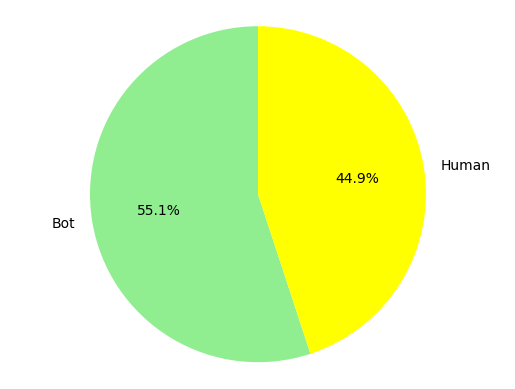

In [6]:
columns_to_drop = ["user_id", "name", "created_at", "day_with_most_tweets"]
df.drop(columns=columns_to_drop, inplace=True)
label = df.pop("bot")

# Visualizing dataset bias
print(label.value_counts())
labels= ['Bot', 'Human']
colors=['lightgreen', 'yellow']
sizes= label.value_counts()
plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

As you can see from the above pie chart, we have a slight bias in favor of the bots-label in our dataset. This might lead to some overtraining down the line.

Lets take a look at our values.

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
statuses_count,11109.0,486.128364,1.240441e+03,0.000000e+00,4.100000e+01,6.800000e+01,81.000000,7.226000e+03
account_age_in_days,11109.0,1827.599874,5.550895e+02,8.910000e+02,1.312000e+03,1.702000e+03,2080.000000,3.901000e+03
number_of_tweets,11109.0,941.636241,1.199367e+03,1.000000e+00,6.700000e+01,1.320000e+02,1703.000000,3.668000e+03
account_average_tweets_per_day,11109.0,0.262958,6.808833e-01,0.000000e+00,2.247191e-02,3.508772e-02,0.058267,6.792821e+00
avg_tweets_per_actual_day,11109.0,13.376648,3.797705e+01,1.000000e+00,1.846154e+00,4.777778e+00,8.058511,1.759500e+03
max_number_of_tweets_in_a_day,11109.0,52.172383,8.794356e+01,1.000000e+00,6.000000e+00,1.800000e+01,75.000000,2.131000e+03
entropy_for_day,11109.0,2.795355,1.460038e+00,0.000000e+00,1.426345e+00,2.921107e+00,3.710199,5.706424e+00
entropy_for_hour,11109.0,1.995941,1.086827e+00,0.000000e+00,1.032784e+00,2.234517e+00,2.789275,5.705947e+00
entropy_for_minute,11109.0,1.017305,6.785934e-01,0.000000e+00,4.854608e-01,7.215676e-01,1.856961,4.017732e+00
avg_hashtags,11109.0,0.156578,2.333411e-01,0.000000e+00,5.000000e-02,8.571429e-02,0.173913,6.441050e+00


Seeing as some of our values differ by many orders of magnitude, we must standardize our data. Initially we will choose the standardscaler for this job, and only scaling non-categorical data. We will try to use robustscaler later to see if this improves our prediction accuracy, as this scaling method removes some noise. If Robustscaler improves prediction accuracy, then it means that our model might benefit from further noise reduction than what we have done so far in our project.

In [8]:
categoric_col_names = df.columns.values.tolist()
del categoric_col_names[:-1]
numeric_col_names = df.columns.values.tolist()
del numeric_col_names[-1]

In [9]:
df2 = df

In [10]:
standard_scaler = StandardScaler().fit(df[numeric_col_names])

df[numeric_col_names] = standard_scaler.transform(df[numeric_col_names])

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
statuses_count,11109.0,-1.343181e-17,1.000045,-0.391917,-0.358863,-0.337096,-0.326615,5.433691
account_age_in_days,11109.0,-9.434247e-17,1.000045,-1.687371,-0.928901,-0.226280,0.454722,3.735422
number_of_tweets,11109.0,-2.750323e-17,1.000045,-0.784313,-0.729281,-0.675083,0.634833,2.273271
account_average_tweets_per_day,11109.0,6.396100e-18,1.000045,-0.386219,-0.353213,-0.334684,-0.300639,9.590714
avg_tweets_per_actual_day,11109.0,6.875807e-18,1.000045,-0.325913,-0.303631,-0.226433,-0.140042,45.980453
max_number_of_tweets_in_a_day,11109.0,-7.675320e-18,1.000045,-0.581904,-0.525047,-0.388589,0.259583,23.639265
entropy_for_day,11109.0,8.826618e-17,1.000045,-1.914663,-0.937696,0.086134,0.626618,1.993922
entropy_for_hour,11109.0,-1.624609e-16,1.000045,-1.836567,-0.886250,0.219526,0.729987,3.413765
entropy_for_minute,11109.0,-7.291554e-17,1.000045,-1.499206,-0.783781,-0.435830,1.237403,4.421738
avg_hashtags,11109.0,-2.686362e-17,1.000045,-0.671058,-0.456769,-0.303706,0.074293,26.933767


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


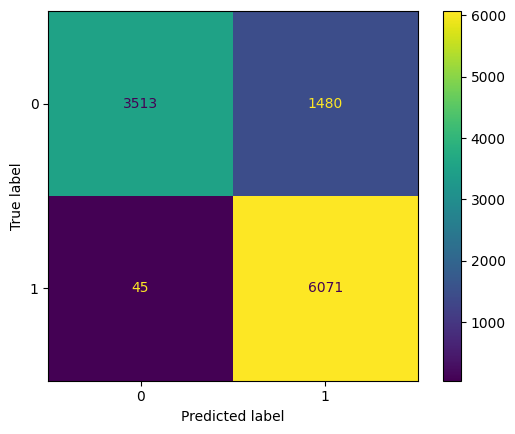

Mean Accuracy on test data = 0.8627239175443334


In [12]:
clf = DecisionTreeClassifier(max_depth=10)
X = df
y = label
clf = clf.fit(X, y)

metrics.plot_confusion_matrix(clf, X, y)
plt.show()
print(f"Mean Accuracy on test data = {clf.score(X, y)}")

Comparing this with robustscaler.

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


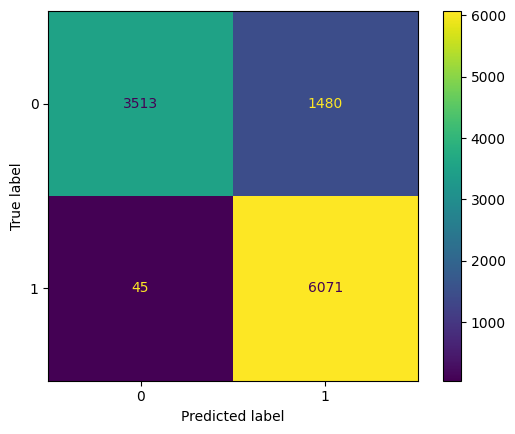

Mean Accuracy on test data = 0.8627239175443334


In [13]:
robust_scaler = RobustScaler().fit(df2[numeric_col_names])

df2[numeric_col_names] = robust_scaler.transform(df2[numeric_col_names])

clf_robust = DecisionTreeClassifier(max_depth=10)
X2 = df2
y = label
clf_robust = clf_robust.fit(X2, y)

metrics.plot_confusion_matrix(clf_robust, X2, y)
plt.show()
print(f"Mean Accuracy on test data = {clf_robust.score(X2, y)}")

As we can see from the results from Standard and Robust scaling, there is no increase in accuracy. Thus we will continue using the StandardScaler, as to better compare our results with the other classification models in this project. 

### Feature Selection / Dimensionality reduction

Now that our data is standardized, we can take a look at what features provide the most information to our desicionmaking process.

In [14]:
useless_features = plot_feature_importance(df, label, max_tree_depth=10)

The following features were dropped:
[]


In [15]:
useless_features = plot_feature_importance(df, label, max_tree_depth=5)

The following features were dropped:
['total_replies', 'total_likes', 'account_discussion_creation_ratio', 'entropy_for_minute', 'entropy_for_day', 'max_number_of_tweets_in_a_day', 'avg_tweets_per_actual_day', 'mean_inactive_period_length_in_seconds', 'mode_inactive_period_length_in_seconds', 'mode_count', 'statuses_count']


With a shallower desicion tree, we can see that more features will be dropped. Plotting confusion matrics in order compare accuracy between trees of depths 10, 5 and 3. to get a feel for the results.

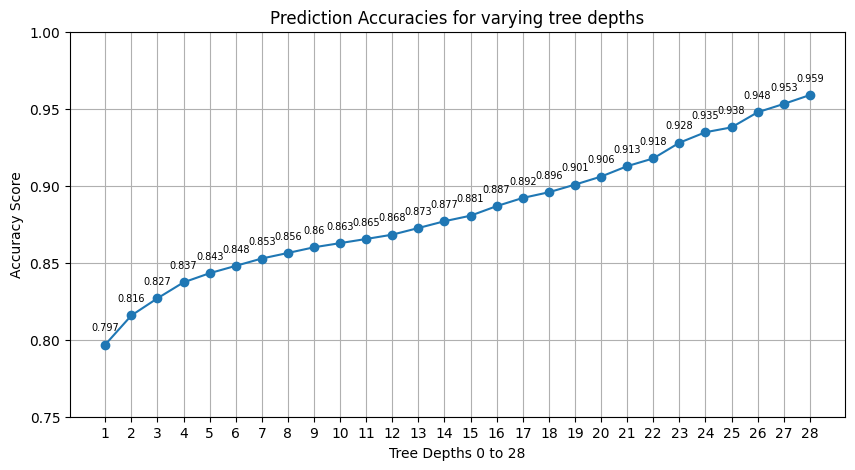

In [16]:
#depth_list = [10, 5, 3]
depth_list = [*range(1,len(df.columns)+1,1)]
accuracy_list = []

for depths in depth_list:
    clf = DecisionTreeClassifier(max_depth=depths)
    X = df
    y = label
    clf = clf.fit(X, y)

    #metrics.plot_confusion_matrix(clf, X, y)
    #plt.show()
    accuracy_list.append(clf.score(X, y))

# plot this for robust scaler as well - Tengel
fig = plt.figure(figsize = (10, 5))
plt.plot(depth_list,accuracy_list,"-o")
plt.ylim(0.75, 1)
plt.xticks(depth_list)
plt.xlabel(f"Tree Depths 0 to {len(depth_list)}")
plt.ylabel("Accuracy Score")
plt.title("Prediction Accuracies for varying tree depths")
plt.grid(True)
for xitem,yitem in zip(depth_list,accuracy_list):
    plt.annotate(round(yitem,3), (xitem,yitem), textcoords="offset points",xytext=(0,10),ha="center", fontsize=7)
plt.show()

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



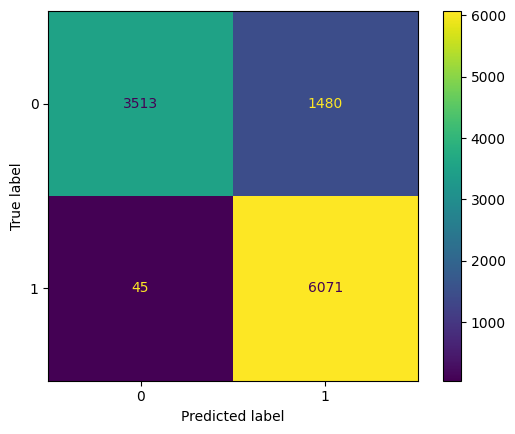

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [17]:
clf = DecisionTreeClassifier(max_depth=10)
X = df
y = label
clf = clf.fit(X, y)

metrics.plot_confusion_matrix(clf, X, y)
plt.show() 

feature_names = X.columns.tolist()
class_names = ["human", "bot"]
plot_tree(clf, X, y, feature_names, class_names)

In [18]:
clf = DecisionTreeClassifier(max_depth=5)
X = df
y = label
clf = clf.fit(X, y)

feature_names = X.columns.tolist()
class_names = ["human", "bot"]
plot_tree(clf, X, y, feature_names, class_names)

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



Creating Different Decision tree models for SHAP explainability.

In [19]:
import pickle
clf = DecisionTreeClassifier(max_depth=10)
X = df
y = label
clf = clf.fit(X, y)
tree_object = clf
filehandler = open("models/Dtree_10_depth_object", 'wb')
pickle.dump(tree_object, filehandler)

In [20]:
clf = DecisionTreeClassifier(max_depth=len(df.columns))
X = df
y = label
clf = clf.fit(X, y)
tree_object = clf
filehandler = open("models/Dtree_28_depth_object", 'wb')
pickle.dump(tree_object, filehandler)

## Applying the Decision tree classification method and the K-fold cross validation

We split the dataset into K-folds. Starting with a typical K of 10.

{'Training Accuracy scores': array([0.86267253, 0.86027205, 0.86387277, 0.86317263, 0.85957191,
       0.86687337, 0.86557311, 0.86337267, 0.86547309, 0.86428643]), 'Mean Training Accuracy': 86.35140599477032, 'Training Precision scores': array([0.80424216, 0.80167475, 0.80584674, 0.80393886, 0.79988297,
       0.80906532, 0.80936803, 0.80519097, 0.81353633, 0.80725926]), 'Mean Training Precision': 0.8060005394877774, 'Training Recall scores': array([0.99200581, 0.99146076, 0.99164244, 0.99382267, 0.9934593 ,
       0.99236919, 0.98873751, 0.99182561, 0.98038147, 0.98982743]), 'Mean Training Recall': 0.9905532199850031, 'Training F1 scores': array([0.88831042, 0.88652425, 0.8891423 , 0.88885278, 0.88622366,
       0.89139127, 0.8901063 , 0.88881654, 0.8892001 , 0.88926969]), 'Mean Training F1 Score': 0.8887837296056889, 'Validation Accuracy scores': array([0.83348335, 0.83348335, 0.8469847 , 0.83888389, 0.8469847 ,
       0.81188119, 0.8379838 , 0.84428443, 0.83528353, 0.83963964]), 'M

The following features were dropped:
[]


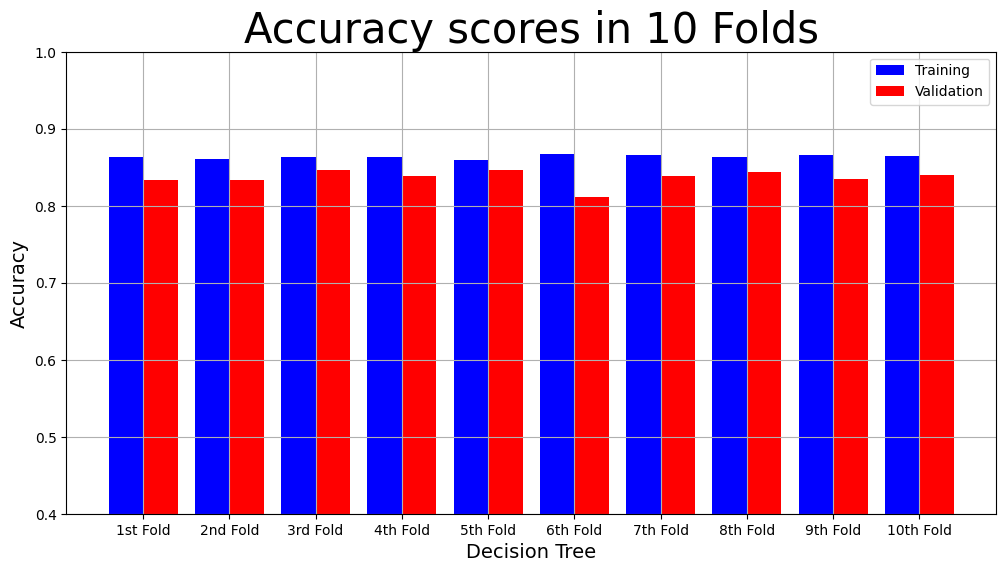

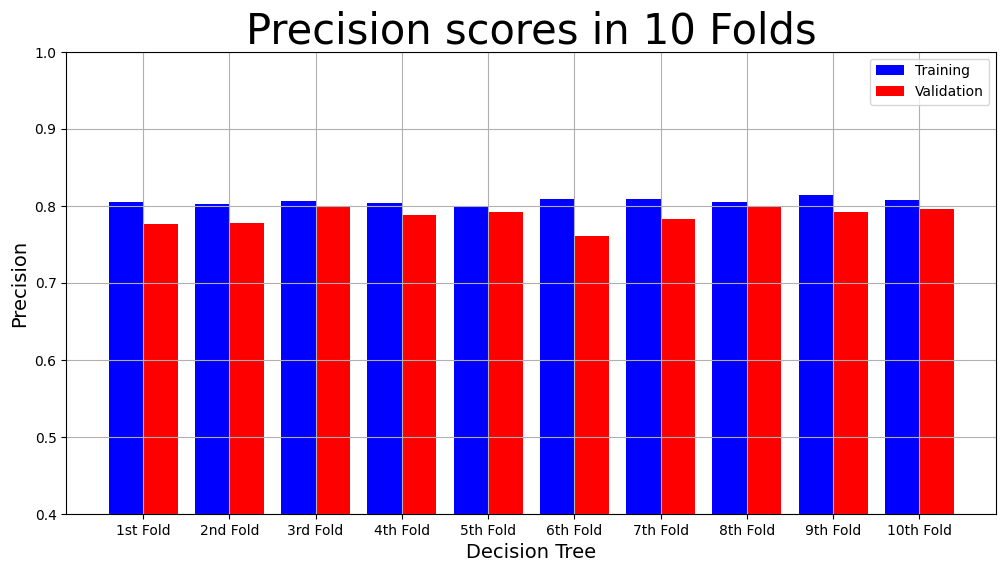

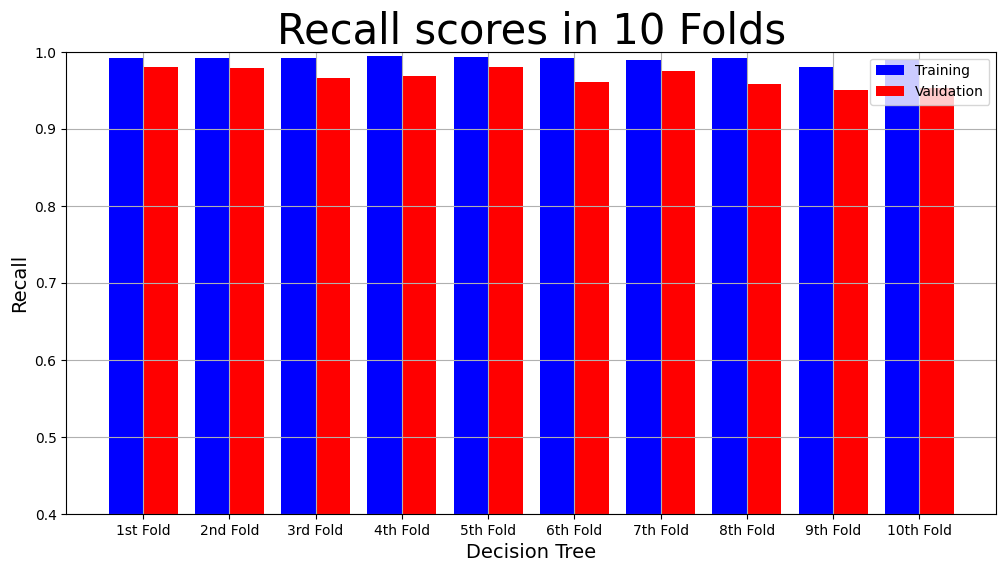

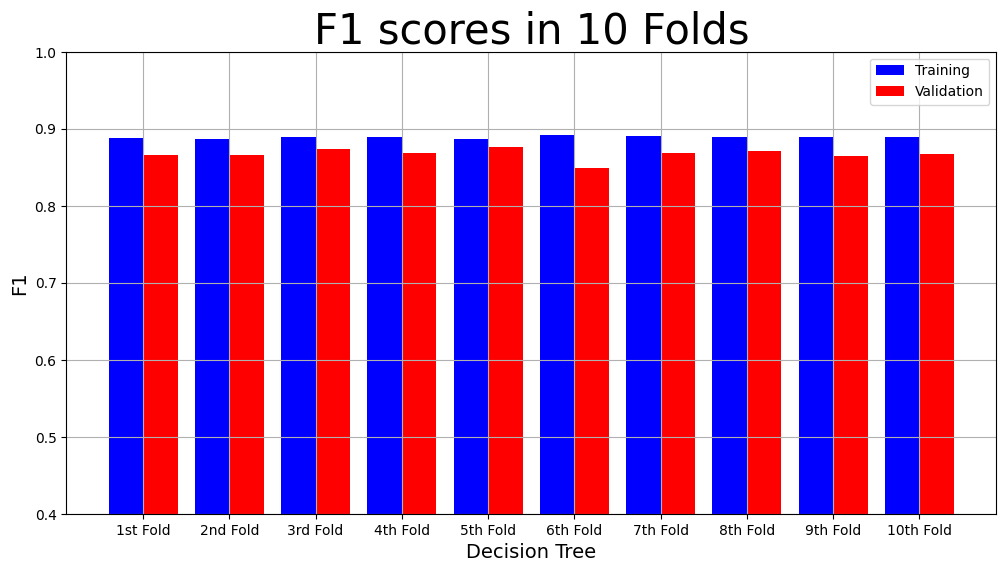

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



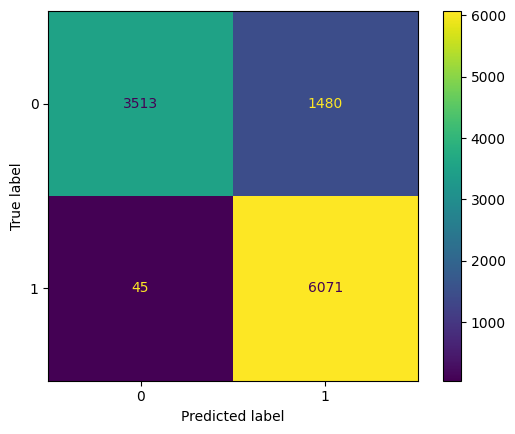

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [21]:
fold_classify_and_plot1(df, label, cv=10, max_tree_depth=10, criterion="gini")

{'Training Accuracy scores': array([0.85957191, 0.85977195, 0.85877175, 0.86027205, 0.85957191,
       0.86267253, 0.86407281, 0.86257251, 0.85787157, 0.86038604]), 'Mean Training Accuracy': 86.05535068409822, 'Training Precision scores': array([0.79831199, 0.79871832, 0.79747019, 0.80140907, 0.80005855,
       0.80397351, 0.80360281, 0.80272607, 0.79697499, 0.8037853 ]), 'Mean Training Precision': 0.800703080987787, 'Training Recall scores': array([0.99672965, 0.99636628, 0.99654797, 0.99200581, 0.99309593,
       0.99255087, 0.99673025, 0.99491371, 0.99545867, 0.98746594]), 'Mean Training Recall': 0.9941865085651523, 'Training F1 scores': array([0.88655462, 0.88666128, 0.8859635 , 0.88657952, 0.88618677,
       0.88836491, 0.88980783, 0.8885464 , 0.88522736, 0.88620802]), 'Mean Training F1 Score': 0.887010021337205, 'Validation Accuracy scores': array([0.83258326, 0.83528353, 0.85058506, 0.84248425, 0.83978398,
       0.80918092, 0.83168317, 0.83708371, 0.84338434, 0.84504505]), 'Mea

The following features were dropped:
['mode_inactive_period_length_in_seconds']


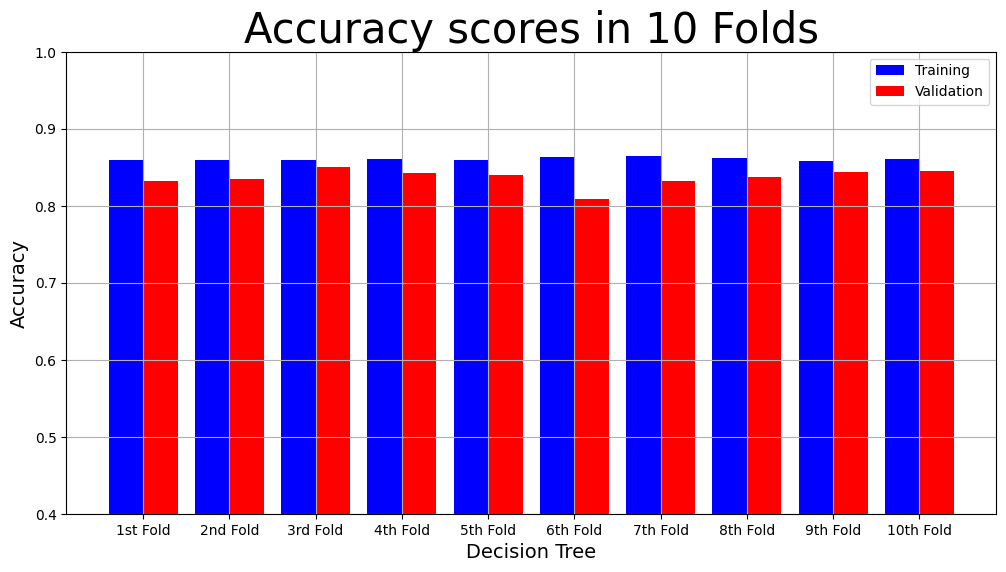

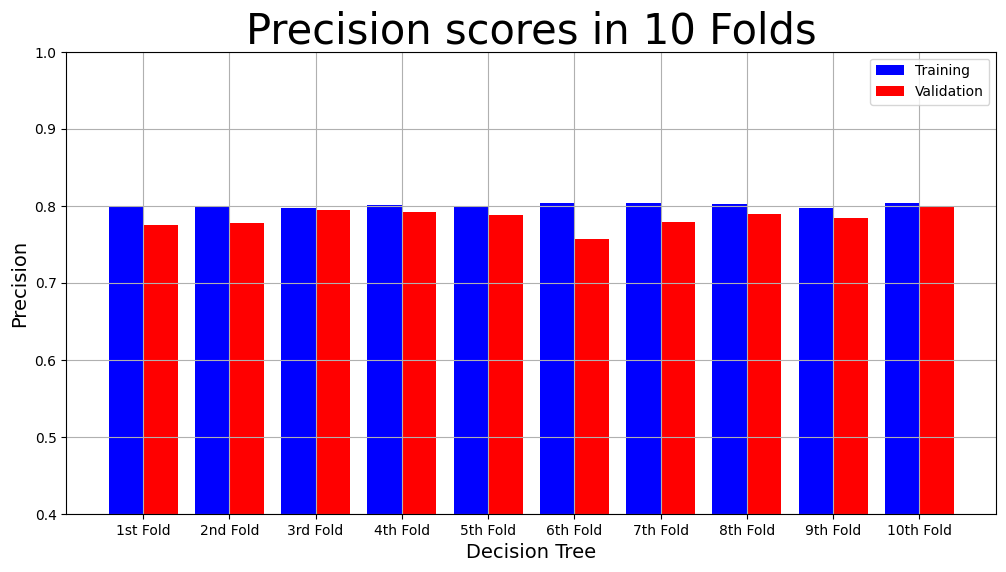

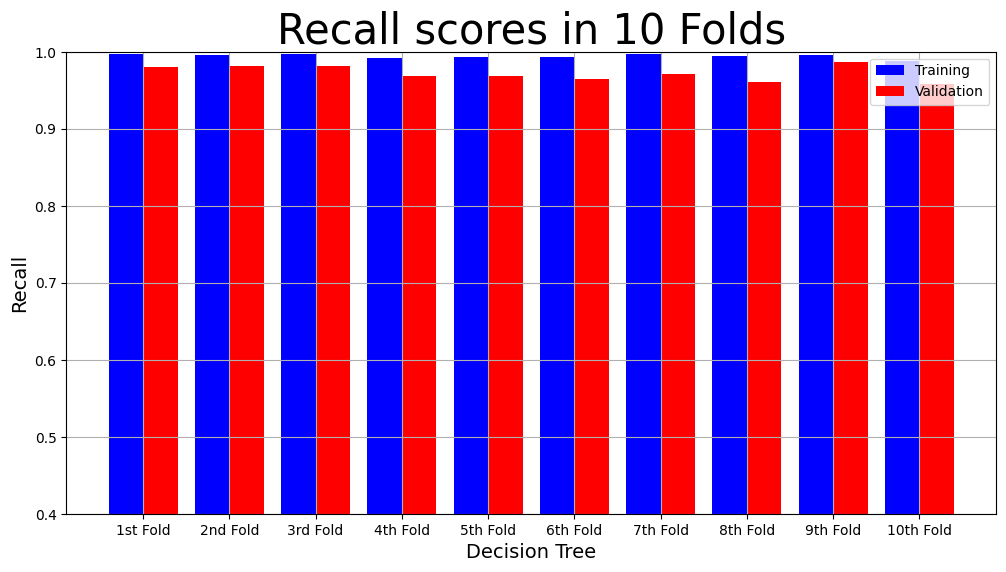

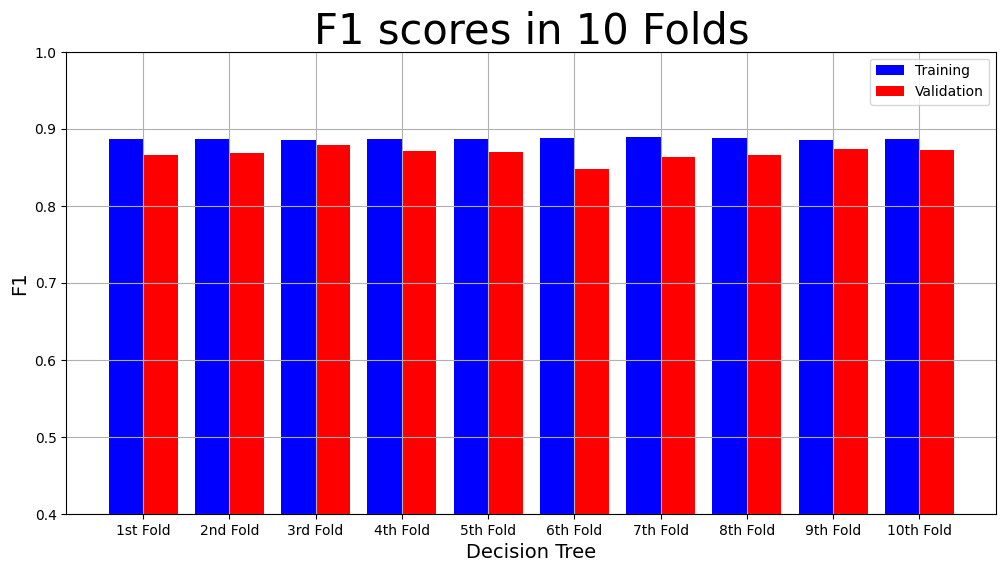

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



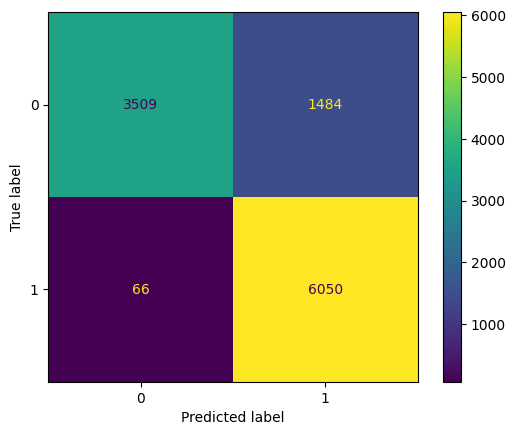

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [22]:
fold_classify_and_plot1(df, label, cv=10, max_tree_depth=10, criterion="entropy")

{'Training Accuracy scores': array([0.85957191, 0.85987197, 0.85897179, 0.86037207, 0.85997199,
       0.86267253, 0.86437287, 0.86227245, 0.85787157, 0.86038604]), 'Mean Training Accuracy': 86.06335228441827, 'Training Precision scores': array([0.79831199, 0.79883467, 0.79770215, 0.80126137, 0.80035129,
       0.80370534, 0.80360018, 0.8024619 , 0.79697499, 0.8037853 ]), 'Mean Training Precision': 0.8006989166821243, 'Training Recall scores': array([0.99672965, 0.99636628, 0.99654797, 0.99255087, 0.9934593 ,
       0.99309593, 0.99745686, 0.99473206, 0.99545867, 0.98746594]), 'Mean Training Recall': 0.9943863533151681, 'Training F1 scores': array([0.88655462, 0.88673296, 0.88610662, 0.8867067 , 0.88651102,
       0.88841934, 0.89009564, 0.88831211, 0.88522736, 0.88620802]), 'Mean Training F1 Score': 0.8870874411227918, 'Validation Accuracy scores': array([0.83258326, 0.83078308, 0.84968497, 0.84158416, 0.84248425,
       0.80828083, 0.83348335, 0.83348335, 0.83978398, 0.84594595]), 'M

The following features were dropped:
['mode_inactive_period_length_in_seconds']


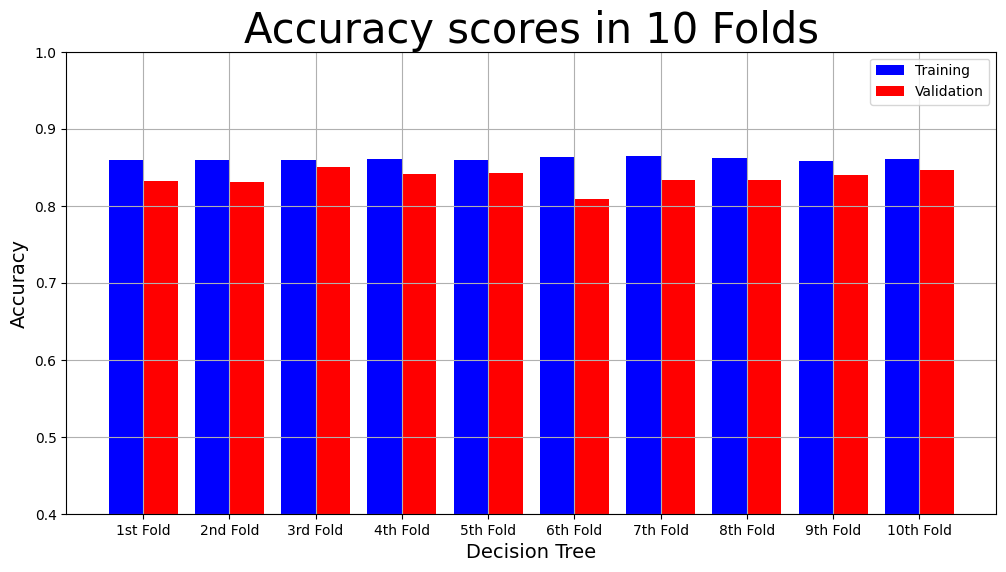

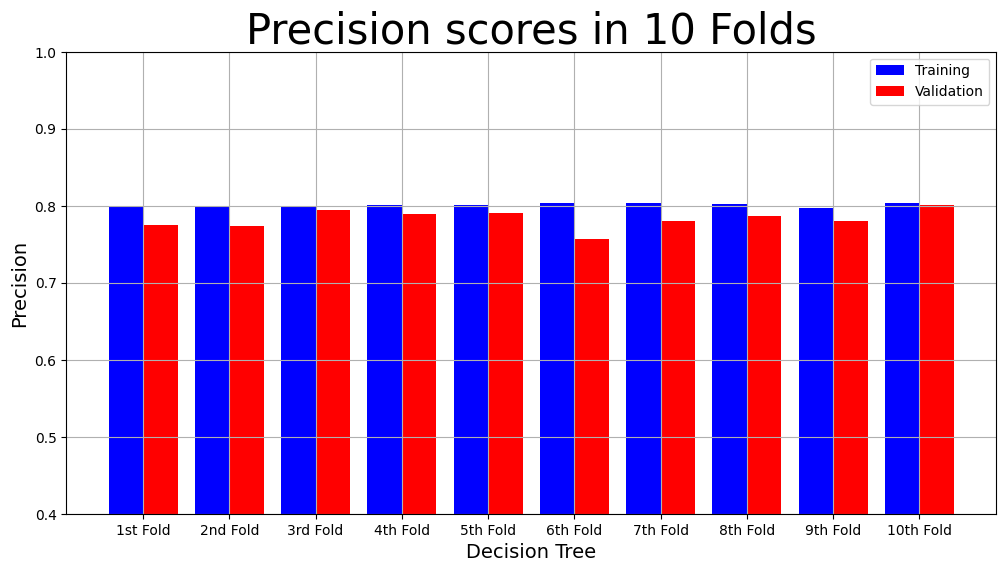

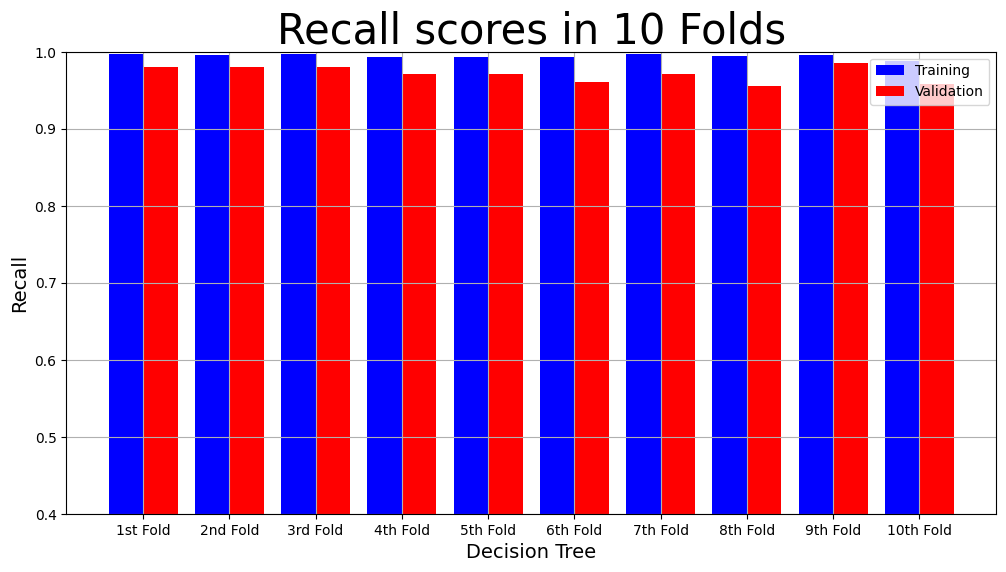

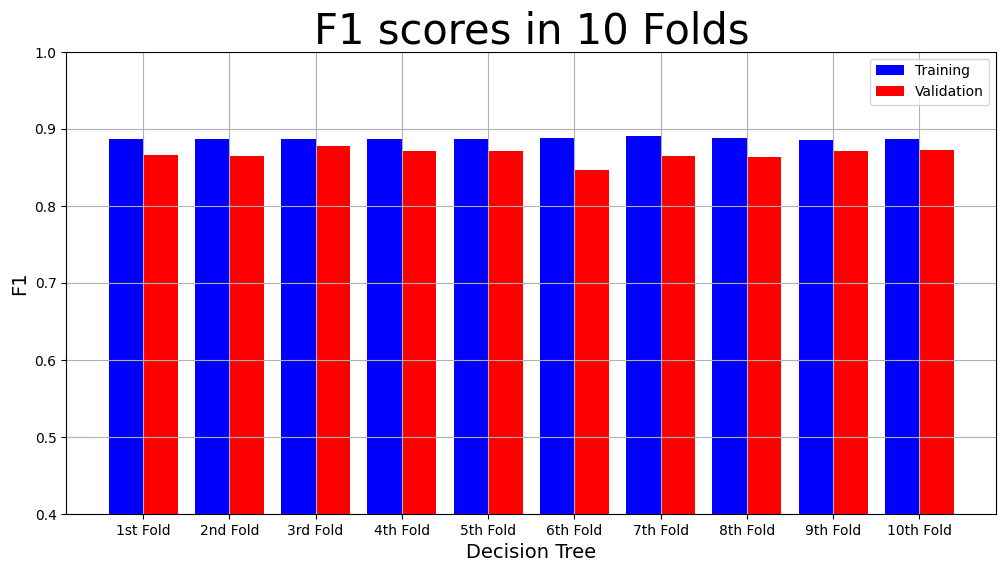

In [23]:
fold_classify_and_plot2(df, label, cv=10, max_tree_depth= 10, criterion="entropy") # no fit

{'Training Accuracy scores': array([0.84426885, 0.84186837, 0.84286857, 0.84346869, 0.84216843,
       0.84606921, 0.84706941, 0.84416883, 0.84606921, 0.84468447]), 'Mean Training Accuracy': 84.4270407236763, 'Training Precision scores': array([0.78856558, 0.78497748, 0.78678722, 0.78950463, 0.78457524,
       0.79090242, 0.79141014, 0.78755646, 0.79059203, 0.78804665]), 'Mean Training Precision': 0.7882917857094177, 'Training Recall scores': array([0.97983285, 0.98164971, 0.98019622, 0.97583576, 0.98328488,
       0.97928779, 0.98074478, 0.9818347 , 0.98001817, 0.98201635]), 'Mean Training Recall': 0.9804701196586614, 'Training F1 scores': array([0.87385563, 0.87236619, 0.87290672, 0.8728366 , 0.87276246,
       0.87507103, 0.87596333, 0.87402975, 0.87517236, 0.87440356]), 'Mean Training F1 Score': 0.8739367626021206, 'Validation Accuracy scores': array([0.82988299, 0.83078308, 0.84518452, 0.83168317, 0.84068407,
       0.80738074, 0.83618362, 0.83528353, 0.83888389, 0.85135135]), 'Me

The following features were dropped:
['total_replies', 'total_likes', 'avg_text_length', 'account_discussion_creation_ratio', 'entropy_for_minute', 'entropy_for_day', 'max_number_of_tweets_in_a_day', 'avg_tweets_per_actual_day', 'mean_inactive_period_length_in_seconds', 'median_inactive_period_length_in_seconds', 'mode_count', 'statuses_count']


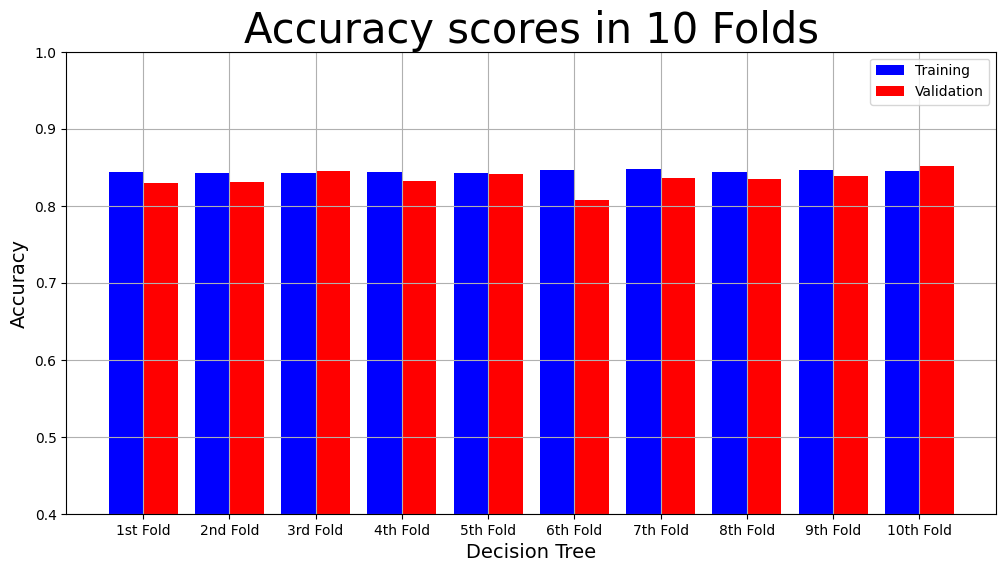

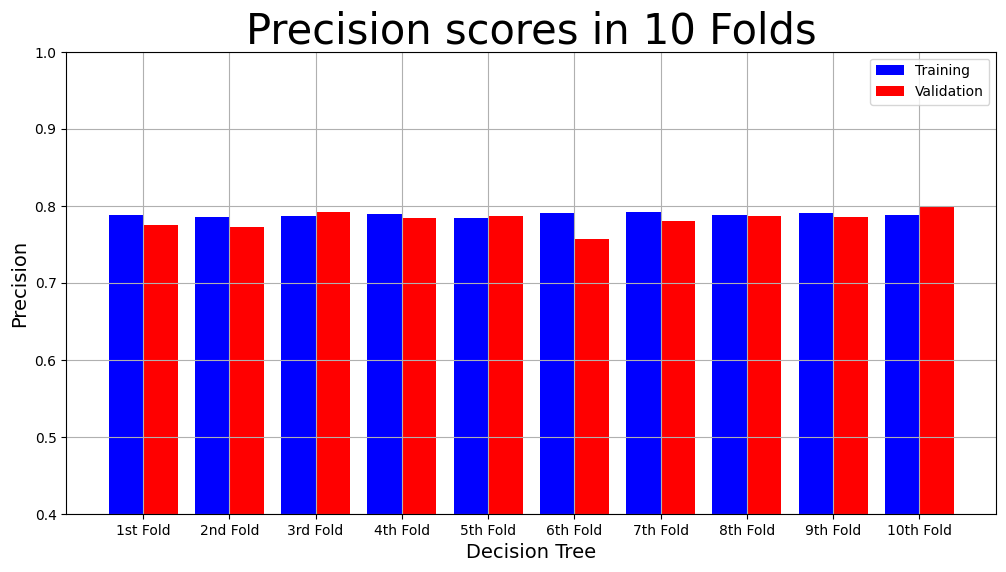

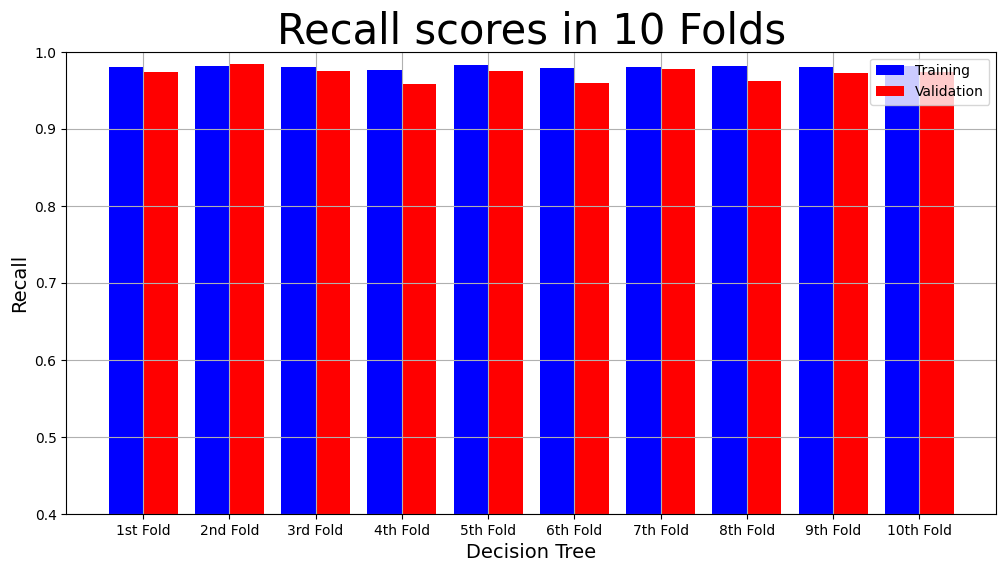

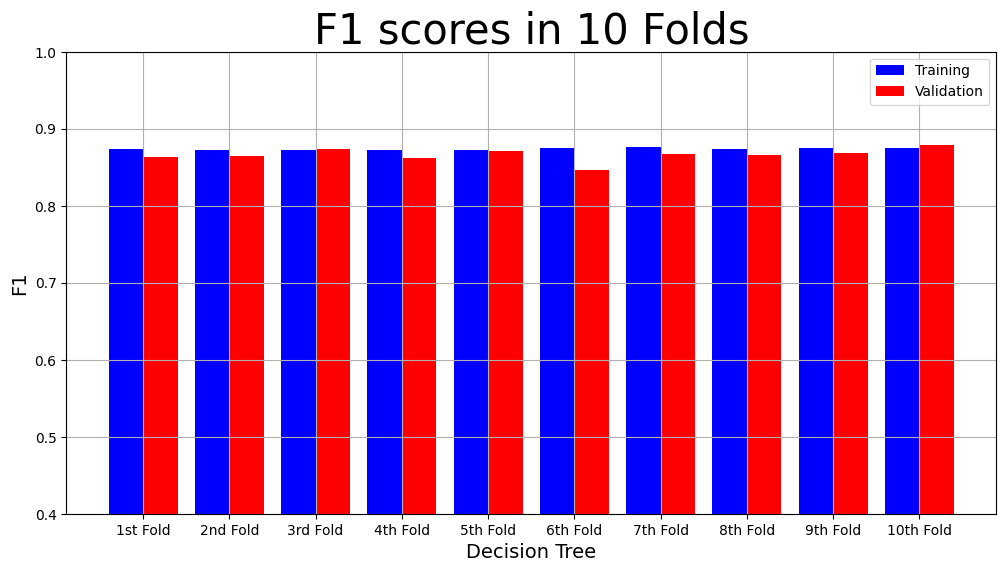

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



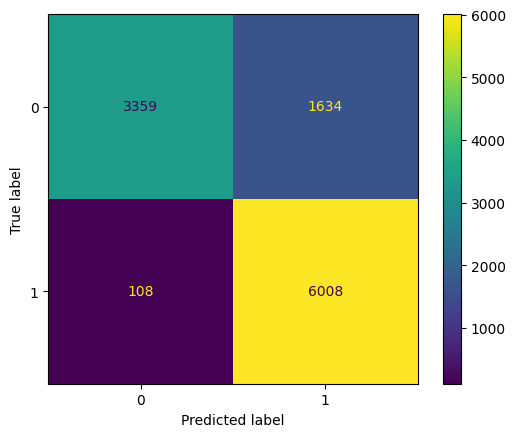

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [24]:
fold_classify_and_plot1(df, label, cv=10, max_tree_depth= 5, criterion='gini')

{'Training Accuracy scores': array([0.84196839, 0.84196839, 0.84156831, 0.84046809, 0.84096819,
       0.84536907, 0.84236847, 0.84166833, 0.84006801, 0.83978398]), 'Mean Training Accuracy': 84.16199261454452, 'Training Precision scores': array([0.78650701, 0.78567268, 0.78554779, 0.78371317, 0.78296703,
       0.78992089, 0.78384626, 0.78478071, 0.78173687, 0.78237592]), 'Mean Training Precision': 0.7847068343806568, 'Training Recall scores': array([0.97856105, 0.98037791, 0.97965116, 0.98092297, 0.98382994,
       0.97965116, 0.98546776, 0.98165304, 0.98437784, 0.982198  ]), 'Mean Training Recall': 0.9816690825465223, 'Training F1 scores': array([0.87208549, 0.87229227, 0.87192755, 0.87129831, 0.87198068,
       0.87461476, 0.87316916, 0.87224598, 0.87143202, 0.87097294]), 'Mean Training F1 Score': 0.8722019172658232, 'Validation Accuracy scores': array([0.83078308, 0.83348335, 0.85058506, 0.84068407, 0.84068407,
       0.81008101, 0.8379838 , 0.83528353, 0.83888389, 0.84774775]), 'M

The following features were dropped:
['mean_inactive_period_length_in_seconds', 'median_inactive_period_length_in_seconds', 'mode_inactive_period_length_in_seconds', 'account_discussion_creation_ratio', 'statuses_count', 'avt_reply_count', 'total_replies', 'total_likes', 'avg_mentions', 'avg_hashtags', 'entropy_for_minute', 'entropy_for_day', 'max_number_of_tweets_in_a_day', 'avg_tweets_per_actual_day', 'avt_favorite_count']


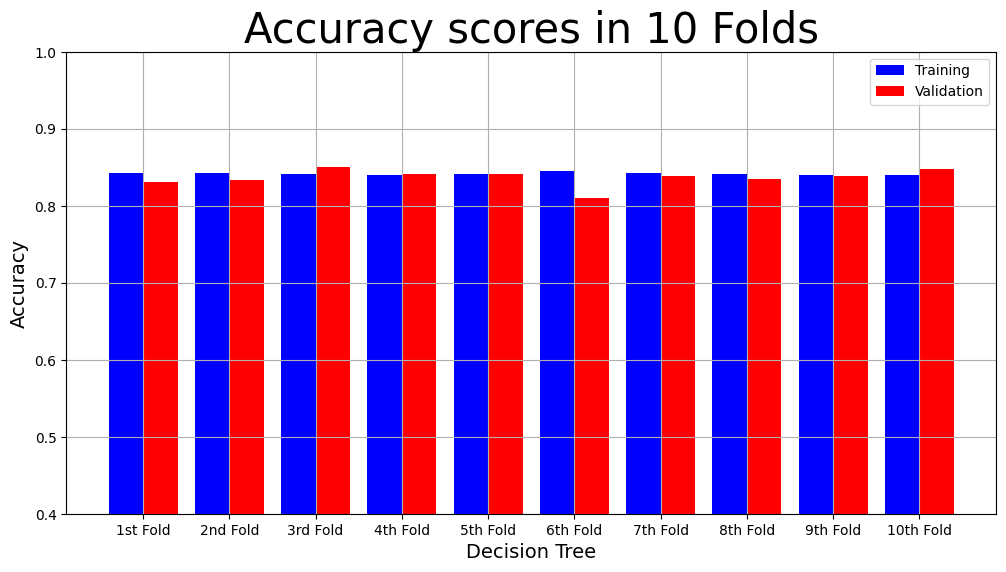

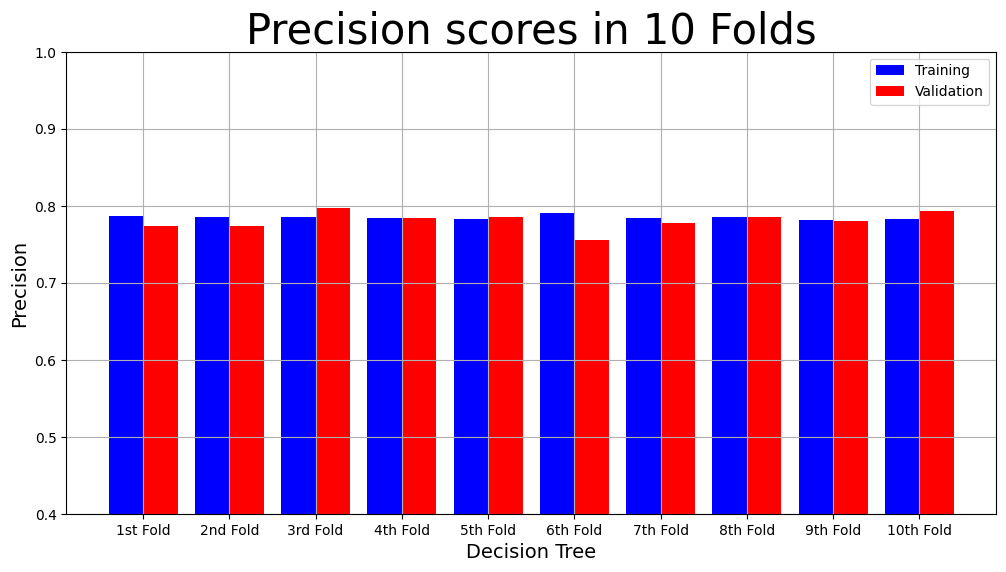

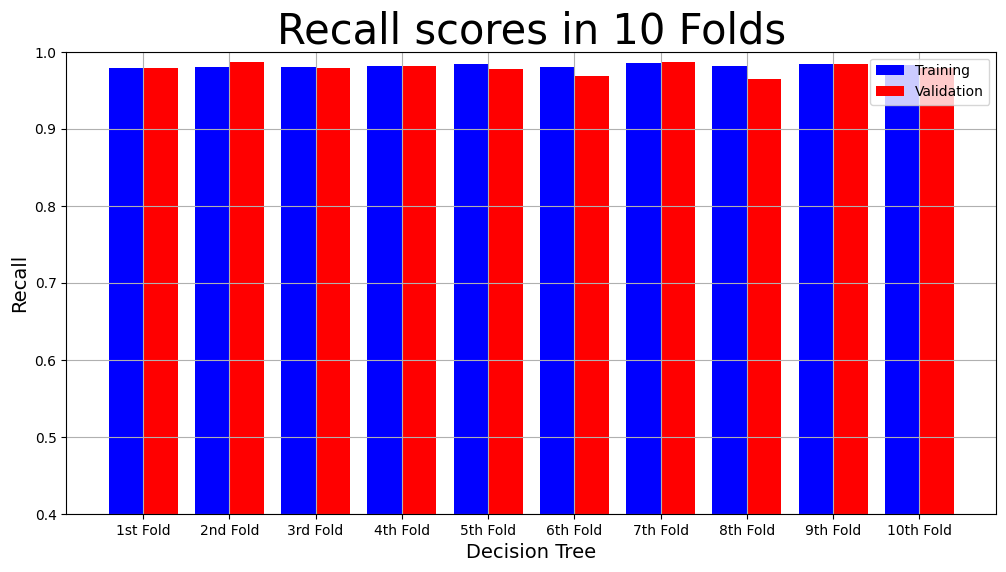

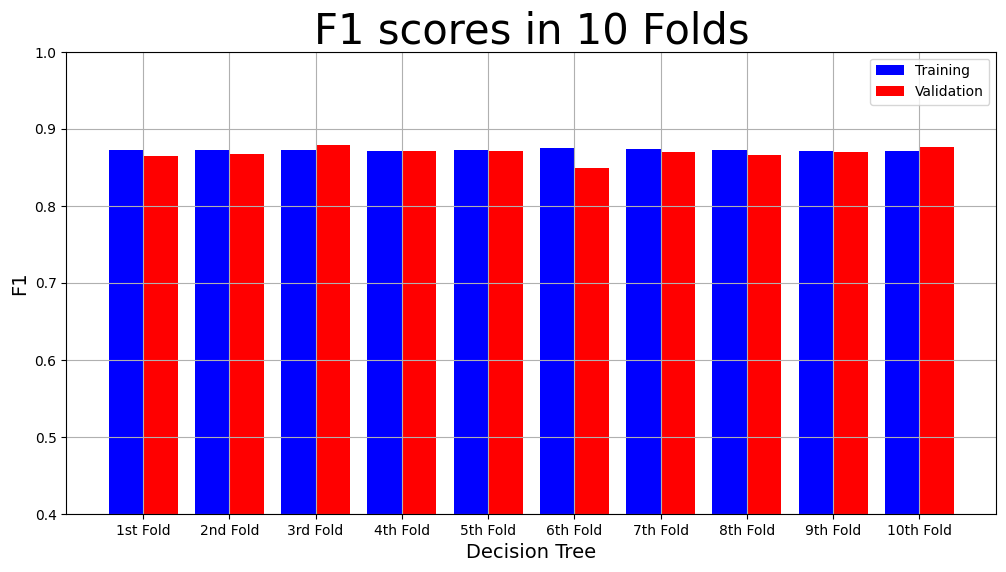

In [25]:
fold_classify_and_plot2(df, label, cv=10, max_tree_depth= 5, criterion='entropy')